<a href="https://colab.research.google.com/github/wbandabarragan/computational-physics-1/blob/main/assignments/classwork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classwork 1: python essentials and data analysis

#### Date: 19 May 2023 (11h00 - 13h00)

#### Credits: 20 points

#### Quiz duration: 2 hours

## Name: Gabriel Balarezo

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec



- This classwork is **individual**. Please include your name in the notebook.



- Within a **single python notebook**, solve the following problems:

### Problem 1 (2D bubble kinematics, 6 points):

This problem consists of studying the motion of the interface of a circular gas bubble that expands isotropically from an initial radius $r_0 = 10\,[m]$. The detailed expansion of gas bubbles requires defining an equation of state for the gas and solving the fluid dynamical equations, but, as a first approximation, the expansion can be studied from a purely kinematical view point. For this problem, you will then use simple kinematics to study bubble expansion in 2D.

Depending on the properties of the medium in which the bubble expands, the time-dependent radius of the bubble, $r_t$, can follow different acceleration functions:

- **In medium 1:** $r_t = r_0 + 10\,t\:[m]$


- **In medium 2:** $r_t = r_0 + 3\,t^2\:[m]$


- **In medium 3:** $r_t = r_0 - 12\,t + 1.1\,t^3\:[m]$


- **In medium 4:** $r_t = r_0\,\exp{(0.9\,t)}\:[m]$

For all these radii, time ($t$) is measured in units of $[s]$.

(a) Create a Python function that reads in a time vector and returns 4 objects containing the time-dependent radii computed with the equations above. Then, define $r_0$ as a global parameter, create a time vector, $t$, that goes from $0$ to $5\,[s]$ with $11$ elements in between, and test the function.

(b) Create a Python function to generate circumferences centred in the origin of a 2D Cartesian plane. The function should return the $(x,y)$ coordinates of circumferences given a value for the radius and a vector containing values for the angle $\theta \in [0, 2\,\pi]$. The latter can be defined as a global parameter. Recall that the coordinates of a circumference can be obtained as follows:

$$x = r\,\cos(\theta)$$

$$y = r\,\sin(\theta)$$

(c) Call the function from (b) using $r_0$ and the $\theta$ vector as input parameters, and make a labeled 2D plot of the initial circumference. As we are interested in studying bubble expansion, set the $x$ and $y$ limits to go from $-100$ to $+100\,[m]$.

(d) Use the time vector created in (a) to calculate $r_t$ and the $(x,y)$ circumference coordinates for different media by calling the functions developed in (a) and (b), respectively. **Hint:** Creating empty lists to host the desired variables and using a for loop to compute the time-dependent radii (and fill up the lists) would be advantageous for this step.

(e) Make a single figure showing the radii, $r_t$, computed in step (d) versus time. The plot should contain 4 lines showing the time evolution of the radii for different media. The radii should be on the Y axis and time on the X axis. In which medium did the bubble expand the farthest within the given time-scale?

(f) Finally, make a 4-panel figure showing all the circumferences computed in step (d). Each panel should contain the results for a different medium, and, as before, the limits for the X and Y axes should go from $-100$ to $+100\,[m]$ in all the panels for better visualisation of the expanding bubbles. **Hint:** Using pyplot's subplots function and a for loop would help to obtain this figure.

In [1]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.constants as ct
import scipy.stats as st

#### Part a

(a) Create a Python function that reads in a time vector and returns 4 objects containing the time-dependent radii computed with the equations above. Then, define $r_0$ as a global parameter, create a time vector, $t$, that goes from $0$ to $5\,[s]$ with $11$ elements in between, and test the function.

In [2]:
# Define the function

def radius_t(time):
    """
    Computes the radii vector for a gas bubble,
    expanding in time.
    Input: time vector
    Output: a radii vector for each medium (4 in total)
    Author: G.B
    Date: 05/18/2023
    """
    # Define the equations
    r_1 = ro +  10*time
    r_2 = ro + 3*time**2
    r_3 = ro - 12*time + 1.1*time**3
    r_4 = ro*np.exp(0.9*time)
    
    return r_1, r_2, r_3, r_4

In [3]:
# Define ro as a global parameter
ro = 10 # units of length (m)

In [4]:
# Call the function, test the defined function
# Create a time-array
time = np.linspace(0, 5, 11) 

# Create a numpy array 
time = np.array(time)

# Feed the function, testing
r1, r2, r3, r4 = radius_t(time)

#print(r1)

#### Part b

(b) Create a Python function to generate circumferences centred in the origin of a 2D Cartesian plane. The function should return the $(x,y)$ coordinates of circumferences given a value for the radius and a vector containing values for the angle $\theta \in [0, 2\,\pi]$. The latter can be defined as a global parameter. Recall that the coordinates of a circumference can be obtained as follows:

$$x = r\,\cos(\theta)$$

$$y = r\,\sin(\theta)$$

In [5]:
# Define the function
def circ_f(radius, angle):
    """
    Computes the rectangular 
    coordinates for a circunference centered at the origin.
    Input: radius of the circcunference, angle vector
    Output: x,y coordinates for the circunference
    Author: G.B
    Date: 05/18/2023
    """
    # Define the functions
    x_values = radius*np.cos(angle)
    y_values = radius*np.sin(angle)
    
    return x_values, y_values

In [6]:
# Define the angle vector
angle = np.linspace(0, 2*np.pi,100)
angle = np.array(angle)

#print(angle)

In [7]:
# Test the function
x, y = circ_f(10, angle)

#print(type(x))

#### Part c

(c) Call the function from (b) using $r_0$ and the $\theta$ vector as input parameters, and make a labeled 2D plot of the initial circumference. As we are interested in studying bubble expansion, set the $x$ and $y$ limits to go from $-100$ to $+100\,[m]$.

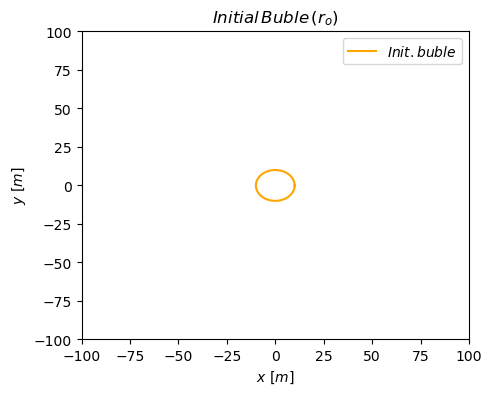

In [8]:
# Call the function
x1, y1= circ_f(10, angle)

# Plotting 
## x1, y1 are already arrays

# Open env.
plt.figure(figsize=(5,4))

# Plot
plt.plot(x1, y1, color = "orange", linestyle = "-", label = r"$Init. buble$")

# Title with latex syntax
plt.title(r"$Initial\,Buble \,(r_o)$")

# Axes titles
plt.xlabel("$x\,\,[m]$")
plt.ylabel("$y\,\,[m]$")

# Legend is added with loc for location
plt.legend(loc=0)

# Axes limits
plt.xlim(-100,100)
plt.ylim(-100,100)

# Show/Save
plt.show()

#### Part d

(d) Use the time vector created in (a) to calculate $r_t$ and the $(x,y)$ circumference coordinates for different media by calling the functions developed in (a) and (b), respectively. **Hint:** Creating empty lists to host the desired variables and using a for loop to compute the time-dependent radii (and fill up the lists) would be advantageous for this step.

In [10]:
print(r1.shape)
print(r2.shape)

(11,)
(11,)


In [9]:
# Call the function with the time vector
r1, r2, r3, r4 = radius_t(time)
#print(radius_dt[1])

# Compute the x,y coordinates for each medium

# Medium 1
x_R1 = []
y_R1 = []

# Medium 2
x_R2 = []
y_R2 = []

# Medium 3
x_R3 = []
y_R3 = []

# Medium 4
x_R4 = []
y_R4 = []


for i in range(11):
    x, y = circ_f(r1[i], angle)
    x_R1.append(x)
    y_R1.append(y)
    
    x, y = circ_f(r2[i], angle)
    x_R2.append(x)
    y_R2.append(y)
    
    x, y = circ_f(r3[3], angle)
    x_R3.append(x)
    y_R3.append(y)
    
    x, y = circ_f(r4[i], angle)
    x_R4.append(x)
    y_R4.append(y)

#### Part e

(e) Make a single figure showing the radii, $r_t$, computed in step (d) versus time. The plot should contain 4 lines showing the time evolution of the radii for different media. The radii should be on the Y axis and time on the X axis. In which medium did the bubble expand the farthest within the given time-scale?



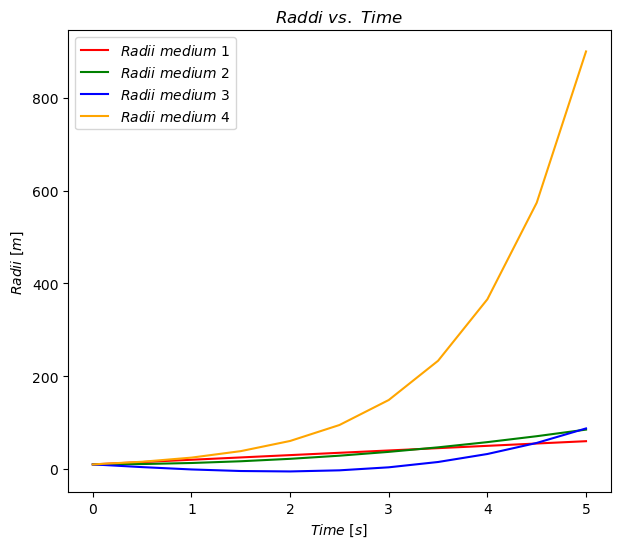

In [11]:
# Plotting

# Open env.
plt.figure(figsize=(7,6))

# Plot
plt.plot(time, r1, color = "red", linestyle = "-", label = r"$Radii\,\,medium\,\,1$")
plt.plot(time, r2, color = "green", linestyle = "-", label = r"$Radii\,\,medium\,\,2$")
plt.plot(time, r3, color = "blue",linestyle = "-", label = r"$Radii\,\,medium\,\,3$")
plt.plot(time, r4, color = "orange", linestyle = "-", label = r"$Radii\,\,medium\,\,4$")

# Title with latex syntax
plt.title(r"$Raddi\,\,vs.\,\,Time$")

# Axes titles
plt.xlabel(r"$Time \,\,[s]$")
plt.ylabel(r"$Radii\,\, [m]$")

# Legend is added with loc for location
plt.legend(loc=0)


# Show/Save
plt.show()

We can see that given the time scale, in the medium 4 is where the bubble expanded the farthtest. It reached a radius bigger than 800 m in 5 seconds. 

#### Part f

(f) Finally, make a 4-panel figure showing all the circumferences computed in step (d). Each panel should contain the results for a different medium, and, as before, the limits for the X and Y axes should go from $-100$ to $+100\,[m]$ in all the panels for better visualisation of the expanding bubbles. **Hint:** Using pyplot's subplots function and a for loop would help to obtain this figure.

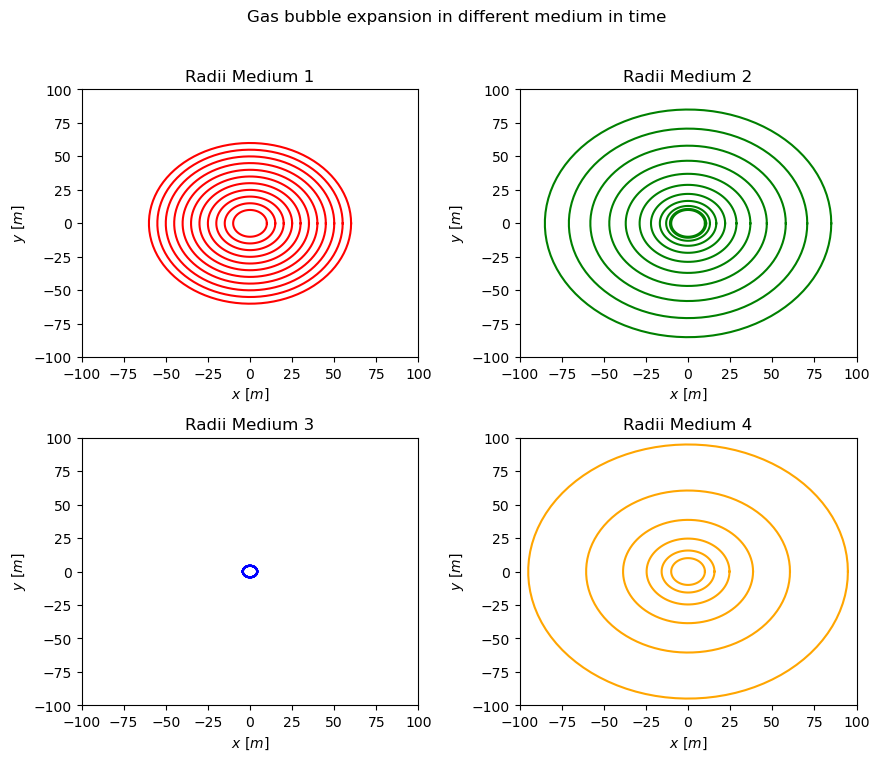

In [14]:
# PLOTTING

# Open the environment
plt.figure(figsize=(10,8))

# This part helps me to add space between the plots so they do not overlap each other
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot 1
plt.subplot(2, 2, 1)
for i in range(0, len(time)):
    plt.plot(x_R1[i], y_R1[i], color = 'red', linestyle = '-')
plt.title('Radii Medium 1')
plt.xlabel('$x\,\,[m]$')
plt.ylabel("$y\,\,[m]$")
# Axes limits
plt.xlim(-100,100)
plt.ylim(-100,100)
    
# Plot 2
plt.subplot(2, 2, 2)
for i in range(0, len(time)):
    plt.plot(x_R2[i], y_R2[i], color = "green", linestyle = '-')
plt.title('Radii Medium 2')
plt.xlabel('$x\,\,[m]$')
plt.ylabel("$y\,\,[m]$")
# Axes limits
plt.xlim(-100,100)
plt.ylim(-100,100)

    
# Plot 3
plt.subplot(2, 2, 3)
for i in range(0, len(time)):
    plt.plot(x_R3[i], y_R3[i], color = 'blue', linestyle = '-')
plt.title('Radii Medium 3')
plt.xlabel('$x\,\,[m]$')
plt.ylabel("$y\,\,[m]$")
# Axes limits
plt.xlim(-100,100)
plt.ylim(-100,100)
    
# Plot 4
plt.subplot(2, 2, 4)
for i in range(0, len(time)):
    plt.plot(x_R4[i], y_R4[i], color = 'orange', linestyle = '-')
plt.title('Radii Medium 4')
plt.xlabel('$x\,\,[m]$')
plt.ylabel("$y\,\,[m]$")

# Axes limits
plt.xlim(-100,100)
plt.ylim(-100,100)
    
# Title 
# Figure title
plt.suptitle("Gas bubble expansion in different medium in time")

# Axes titles 
plt.xlabel('$x\,\,[m]$')
plt.ylabel("$y\,\,[m]$")


plt.show()

### Problem 2 (Maxwell–Boltzmann distribution, 6 points):

For a system containing a large number of identical non-interacting, non-relativistic classical particles in thermodynamic equilibrium, the fraction of the particles within an infinitesimal element of the three-dimensional velocity space $d^3v$, centered on a velocity vector of magnitude $v$, is given by

$$f(v)\:d^3v = \biggl[\frac{m}{2 \pi k_bT}\biggr]^\frac{3}{2} \, \exp\left(-\frac{mv^2}{2k_bT}\right)\:d^3v$$

where $m$ is the particle mass, $k_b$ is the Boltzmann constant, $T$ is thermodynamic temperature, 
$f(v)$ is the (Maxwell–Boltzmann) probability distribution function (PDF), properly normalized so that $\int f(v) \, d^3v$ over all velocities is unity.

Recognising the symmetry of $f(v)$, one can integrate over solid angle and write a probability distribution of speeds as the function:

$$f(v) = \biggl[\frac{m}{2 \pi k_bT}\biggr]^\frac{3}{2} \, 4\pi v^2 \exp\left(-\frac{mv^2}{2k_bT}\right)$$

This probability density function gives the probability, per unit speed, of finding the particle with a speed near $v$. This equation is simply the Maxwell–Boltzmann distribution

(a) Create a python function that reads in the particle mass, the thermodynamic temperature, and the velocity, and then returns the (Maxwell–Boltzmann) probability distribution function, $f(v)$.

(b) Define a python dictionary containing the symbols of 5 noble gases as "keys" with their respective atomic masses in SI units ($m=m_u\,A_r$) as elements. Here, $m_u$ is the atomic mass constant and $A_r$ is the standard atomic weight. For each atom, we have:

- Helium ($\rm He$) has $A_r(\rm He)=4.003$

- Neon ($\rm Ne$) has $A_r(\rm Ne)=20.180$

- Argon ($\rm Ar$) has $A_r(\rm Ar)=39.963$

- Krypton ($\rm Kr$) has $A_r(\rm Kr)=83.798$

- Xenon ($\rm Xe$) has $A_r(\rm Xe)=131.293$

(c) Generate a 1D velocity vector covering the range from $0$ to $3000\,\rm \frac{m}{s}$, and fix the temperature of the gas at $50\,\rm K$.

(d) Using the values of atomic masses from the dictionary in point (b), and the fixed velocity vector and temperature defined in point (c), call the function created in point (a) to obtain a set of arrays with the Maxwell–Boltzmann distributions, $f(v)$, for each nobel gas. (**Hint:** a for loop can help access the dictionary elements).

(e) Use matplotlib to make a single high-quality labeled   of the velocity distribution of all 5 nobel gases for the set temperature. The plot should have $f(v)$ on the Y axis and $v$ on the X axis.

(f) Repeat steps (c,d,e) for 3 more gas temperatures ($150\,\rm K$, $293\,\rm K$, and $500\,\rm K$), and report all the results in a single 4-panel high-quality labeled figure. What happens with the velocity distributions when we increase the temperature of the gas?



#### Part a

(a) Create a python function that reads in the particle mass, the thermodynamic temperature, and the velocity, and then returns the (Maxwell–Boltzmann) probability distribution function, $f(v)$.

$$f(v) = \biggl[\frac{m}{2 \pi k_bT}\biggr]^\frac{3}{2} \, 4\pi v^2 \exp\left(-\frac{mv^2}{2k_bT}\right)$$

In [15]:
#Define the function
def blt_dist(m, T, v):
    """
    Function that computes the Boltzmann probability 
    distribution function of a gas.
    Input: mass, Temperature, velocity
    Output: Boltzmann probability distribution function
    Author: G.B
    Date:05/18/2023
    """
    fv = (m/(2*np.pi*kb*T))**(3/2)*4*np.pi*v**2*np.exp((-m*v**2)/(2*kb*T))
    
    return fv

#### Part b

(b) Define a python dictionary containing the symbols of 5 noble gases as "keys" with their respective atomic masses in SI units ($m=m_u\,A_r$) as elements. Here, $m_u$ is the atomic mass constant and $A_r$ is the standard atomic weight. For each atom, we have:

- Helium ($\rm He$) has $A_r(\rm He)=4.003$

- Neon ($\rm Ne$) has $A_r(\rm Ne)=20.180$

- Argon ($\rm Ar$) has $A_r(\rm Ar)=39.963$

- Krypton ($\rm Kr$) has $A_r(\rm Kr)=83.798$

- Xenon ($\rm Xe$) has $A_r(\rm Xe)=131.293$

In [16]:
# Creating the dictionary

# Atomic mass constant

mu = ct.atomic_mass

#Define the dict
noble_gases = {"He":mu*4.003,"Ne": mu*20.180,"Ar": mu*39.963,"Kr": mu*83.798,"Xe": mu*131.293}

#### Part c

(c) Generate a 1D velocity vector covering the range from $0$ to $3000\,\rm \frac{m}{s}$, and fix the temperature of the gas at $50\,\rm K$.

In [17]:
# Creating the 1D array

velocity = np.arange(0, 3000, 0.1) # in units of m/s

# Fix the temperature
T = 50 # kelvin

# Define kb
kb = ct.Boltzmann

#print(kb)

#### Part d

(d) Using the values of atomic masses from the dictionary in point (b), and the fixed velocity vector and temperature defined in point (c), call the function created in point (a) to obtain a set of arrays with the Maxwell–Boltzmann distributions, $f(v)$, for each nobel gas. (**Hint:** a for loop can help access the dictionary elements).

In [18]:
# Create an empty list. In this list I will append the array density probability function for each gas
f_v =[]

# Loop for getting fv for each gas
for i in noble_gases:
    f_v.append(blt_dist(noble_gases[i], T, velocity))
    
# Transform into a numpy array
f_v = np.array(f_v)

#### Part e

(e) Use matplotlib to make a single high-quality labeled   of the velocity distribution of all 5 nobel gases for the set temperature. The plot should have $f(v)$ on the Y axis and $v$ on the X axis.


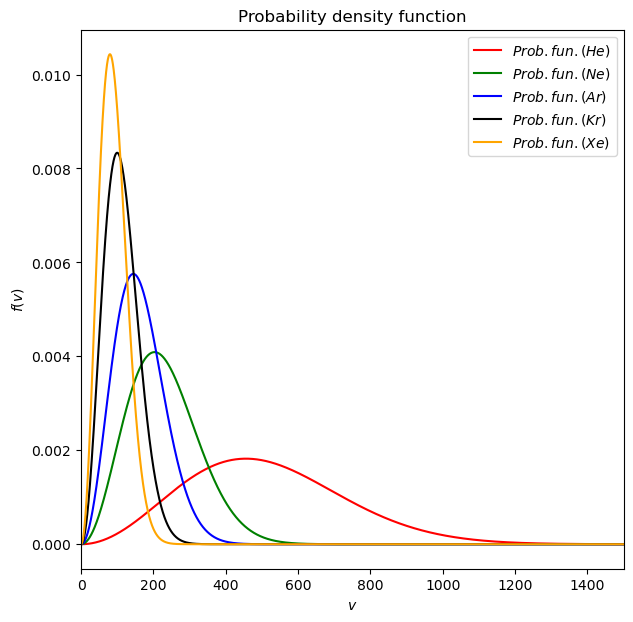

In [19]:
# Open the environment
plt.figure(figsize = (7, 7))

# Define colors and labels so we can use a for loop to plot

colors = ['red', 'green', 'blue', 'black','orange']  # List of colors
labels = [r'$Prob. fun. (He)$', r'$Prob. fun. (Ne)$', r'$Prob. fun. (Ar)$', r'$Prob. fun. (Kr)$',
         r'$Prob. fun. (Xe)$']  # List of labels


# Plot 
for i in range(0, len(f_v)):
    plt.plot(velocity, f_v[i], color = colors[i], linestyle = '-', label = labels[i])

    
# Title 
plt.title("Probability density function")

# Axes titles 
plt.xlabel(r'$v$')
plt.ylabel(r"$f(v)$")

# Axes limits
plt.xlim(0,1500)


plt.legend(loc='best')
plt.show()


#### Part f

(f) Repeat steps (c,d,e) for 3 more gas temperatures ($150\,\rm K$, $293\,\rm K$, and $500\,\rm K$), and report all the results in a single 4-panel high-quality labeled figure. What happens with the velocity distributions when we increase the temperature of the gas?

In [21]:
# Velocity vector 
velocity = np.arange(0, 3000, 0.1) # in units of m/s

# set the new temperatures
T1 = 150 # kelvin
T2 = 293
T3 = 500

# For T1
f_v1 =[]

# For T2
f_v2 =[]

# For T3
f_v3 =[]

for i in noble_gases:
    
    f_v1.append(blt_dist(noble_gases[i], T1, velocity))
    f_v2.append(blt_dist(noble_gases[i], T2, velocity))
    f_v3.append(blt_dist(noble_gases[i], T3, velocity))
    
f_v1 = np.array(f_v1)
f_v2 = np.array(f_v2)
f_v3 = np.array(f_v3)

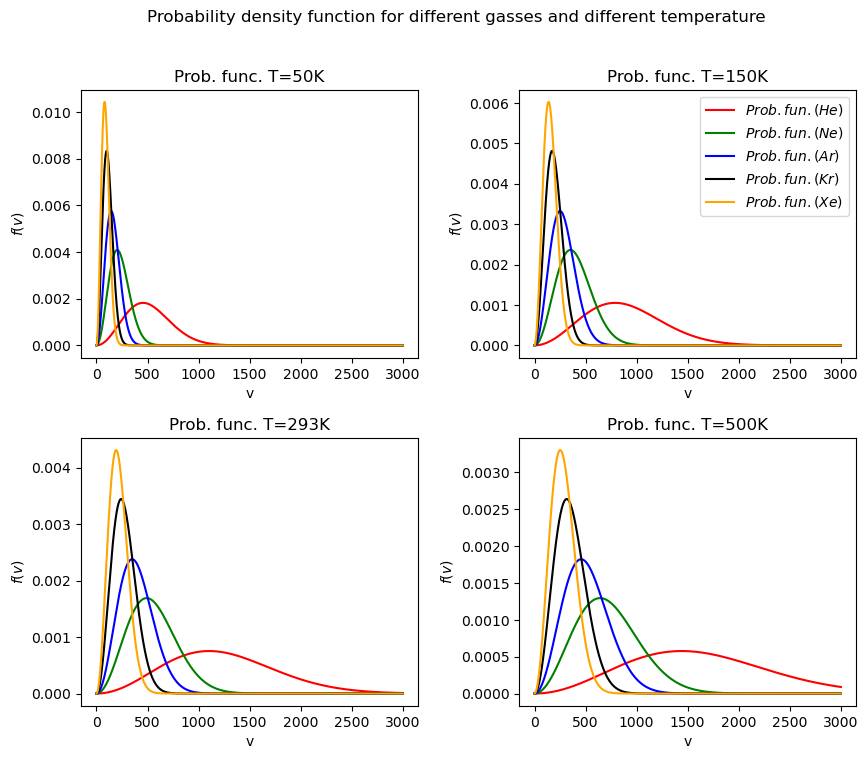

In [23]:
# PLOTTING

# Define colors and labels so we can use a for loop to plot
colors = ['red', 'green', 'blue', 'black','orange']  

labels = [r'$Prob. fun. (He)$', r'$Prob. fun. (Ne)$', r'$Prob. fun. (Ar)$', r'$Prob. fun. (Kr)$',
         r'$Prob. fun. (Xe)$']  
# These are the same colors, and labels I just defined before, but I copied for reference


# Open the environment
plt.figure(figsize=(10,8))

# This part helps me to add space between the plots so they do not overlap each other
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot 1
plt.subplot(2, 2, 1)
for i in range(0, len(f_v)):
    plt.plot(velocity, f_v[i], color = colors[i], linestyle = '-', label = labels[i])
plt.title('Prob. func. T=50K')
plt.xlabel('v')
plt.ylabel(r"$f(v)$")
    
# Plot 2
plt.subplot(2, 2, 2)
for i in range(0, len(f_v1)):
    plt.plot(velocity, f_v1[i], color = colors[i], linestyle = '-', label = labels[i])
plt.title('Prob. func. T=150K')
plt.xlabel('v')
plt.ylabel(r"$f(v)$")
plt.legend(loc='best')
    
# Plot 3
plt.subplot(2, 2, 3)
for i in range(0, len(f_v2)):
    plt.plot(velocity, f_v2[i], color = colors[i], linestyle = '-', label = labels[i])
plt.title('Prob. func. T=293K')
plt.xlabel('v')
plt.ylabel(r"$f(v)$")
    
# Plot 4
plt.subplot(2, 2, 4)
for i in range(0, len(f_v3)):
    plt.plot(velocity, f_v3[i], color = colors[i], linestyle = '-', label = labels[i])
plt.title('Prob. func. T=500K')
plt.xlabel('v')
plt.ylabel(r"$f(v)$")
    
# Title 
# Figure title
plt.suptitle("Probability density function for different gasses and different temperature")

# Axes titles 
plt.xlabel('v')
plt.ylabel(r"$f(v)$")


#plt.xlim(0,1000)

plt.show()

#### ANSWER: 
When the temperature increases, we can observe that the velocity distribution for each gas gets broarder, shifting 
the mean velocity to higher velocities, and also reducing the height of the curve.

### Problem 3 (Black body radiation, 8 points):

This problem consists of determining the temperature of our Sun (which is an almost perfect black body) based on a regression performed on its spectrum. The Solar spectrum can be found in the link below. The data you will analyse were obtained from satellite instruments, so they do not contain atmospheric absorption.

Please download th data file from:
https://github.com/wbandabarragan/computational-physics-1/blob/main/assignments/AM0AM1_5.csv

This data file contains 6 columns, but we will use only the first two:

1. Wavelength ($\lambda$ in $nm$)

2. Extraterrestrial ($J_{\lambda}\equiv$ spectral radiosity in $W\,m^{-2}\,nm^{-1}$)

As you know from quantum theory, the spectral radiance of a black body is described by Planck's law, so this would be a natural fitting model to be used for the regression. Planck's law reads:

$$B_\lambda =\frac{2hc^2}{\lambda^5}\frac 1{ \exp\left(\frac{hc}{\lambda k_\mathrm B T}\right) - 1}$$ 

where $B_\lambda$ is in units of $W\,m^{-2}\,nm^{-1}\,sr^{-1}$ in the SI system. To obtain the spectral radiosity, you need to integrate the spectral radiance over the solid angle ($\Omega$, in units of steradian $[sr]$) subtended by the emitting object (which in this case is the Sun), so:

$$J_{\lambda}=\int_{\Omega}B_\lambda\,d\Omega$$


We are far away from the Sun, so you should consider the Sun size on the sky to obtain the correct solid angle. For a celestial body, the solid angle (in units of $[sr]$) can be computed from of its radius, $R=696340\,[km]$ and the average Earth-Sun distance (i.e. the distance from the observer to the object), $d=151.35\times 10^6\,[km]$, using:

$$\Omega = 2 \pi \left (1 - \frac{\sqrt{d^2 - R^2}}{d} \right)$$  


(a) Create a python function that computes and returns the solid angle $\Omega$ from the Sun radius, $R$, and Earth-Sun distance, $d$. Then, call your function and report the solid angle in units of $[sr]$.

(b) Create a python function that reads the filename ("AM0AM1_5.csv"), opens the data file using pandas, place the first two columns into pandas objects, and returns them as numpy arrays.

(c) Call the function and obtain the wavelength ($\lambda$ in $[nm]$) and spectral radiosity ($J_{\lambda}$ in $[kW\,m^{-2}\,nm^{-1}]$). Then, make a high-quality labeled plot of spectral radiosity (in the Y axis) versus wavelength (in the X axis). Does the relation between the two look linear? **Hints:** The conversion to $[kW]$ will help later on, and computing the Spearman and Pearson coefficients may help in characterising the relationship.

(d) Create a python function that defines the physically-motivated fitting function (i.e. $J_{\lambda}$ (in units of $[kW\,m^{-2}\,nm^{-1}]$) as obtained from the Planck law). Which variable should be the free parameter for the regression? **Hints:** Be very careful in handling the units and do not forget to use the Sun's solid angle computed in (a) to obtain the spectral radiosity from the spectral radiance.

(e) Carry out the regression using python tools (e.g. scipy's curve_fit function). Report the best-fit function, what is the temperature of the Sun? **Hint:** since the fitting function is not a simple polynomial function, it may help to aid curve_fit by providing an initial guess for the regression (see: p0 parameter).

(f) Make a high-quality labeled plot of spectral radiosity (in the Y axis) versus wavelength (in the X axis) showing both the experimental data and the best-fit model (obtained from Planck's law for the fitted temperature).


(g) Finally, you will compare the results to predictions based on classical theory. As you know, the black body radiation in classical theory is described by the Rayleigh-Jeans law. Create a python function that returns the spectral radiosity based on temperature, but now according to the Rayleigh-Jeans function given below. **Hint:** As before, be careful with the units and do not forget to use the Sun's solid angle computed in (a) to obtain the spectral radiosity, $J_{\lambda}$, from the spectral radiance:

$$B_{\lambda}= \frac{2ck_BT}{\lambda^4}$$

(h) Make a high-quality labeled plot of spectral radiance (in the Y axis) versus wavelength (in the X axis) showing both the experimental data and the best-fit model (i.e. Planck's law for the fitted temperature). Does classical theory correctly describe the black body spectrum of the Sun? **Hint:** You may wish to limit the Y axis of the plot to be able to compare the lines.

#### Part a 

(a) Create a python function that computes and returns the solid angle $\Omega$ from the Sun radius, $R$, and Earth-Sun distance, $d$. Then, call your function and report the solid angle in units of $[sr]$.

$$\Omega = 2 \pi \left (1 - \frac{\sqrt{d^2 - R^2}}{d} \right)$$  

$d=151.35\times 10^6\,[km]$

$R=696340\,[km]$

In [24]:
# Define the function
# We can use lambda function

d = 151.35 * 1e6 # km
R = 696340. # km


# Define the lambda function
s_a = lambda R, d: 2*np.pi*(1-(np.sqrt(d**2 - R**2)/d))

# Call the function 
solid_angle = s_a(R, d) 


In [25]:
# Report the solid angle
print("Solid angle [sr]: ", solid_angle) 

Solid angle [sr]:  6.650128032845868e-05


#### Part b

(b) Create a python function that reads the filename ("AM0AM1_5.csv"), opens the data file using pandas, place the first two columns into pandas objects, and returns them as numpy arrays.

In [26]:
# Define the function
def read_file(filename):
    """
    Opens a file using pandas, 
    and return the first two columns 
    as numpy arrays.
    Input: filename
    Output: first two columns as numpy arrays
    """
    # Read the file 
    df = pd.read_csv(filename, sep = ",")
    
    # Place the first column into arrays
    wavelength = np.array(df['Wavelength (nm)']) # in units of nm
    radiosity = np.array(df['Extraterrestrial W*m-2*nm-1']) # in units of W*m-2nm-1
    
    return wavelength, radiosity 

In [28]:
# Test the function

# Filename
#file ="./data/AM0AM1_5.csv"

#wavelength, radiosity = read_file(file)

#print(wavelength)
#print(radiosity)

#### Part c


(c) Call the function and obtain the wavelength ($\lambda$ in $[nm]$) and spectral radiosity ($J_{\lambda}$ in $[kW\,m^{-2}\,nm^{-1}]$). Then, make a high-quality labeled plot of spectral radiosity (in the Y axis) versus wavelength (in the X axis). Does the relation between the two look linear? **Hints:** The conversion to $[kW]$ will help later on, and computing the Spearman and Pearson coefficients may help in characterising the relationship.

In [29]:
# Calling the function
# Above I tested the function, I am going to use the same variables 

# Filename
file ="./data/AM0AM1_5.csv"

# Calling the function
wavelength, radiosity = read_file(file)

# As suggested above, let's perform the transformation to kW
radiosity = radiosity / 1000 # 1 W -> 0.001 kW

#print(radiosity)

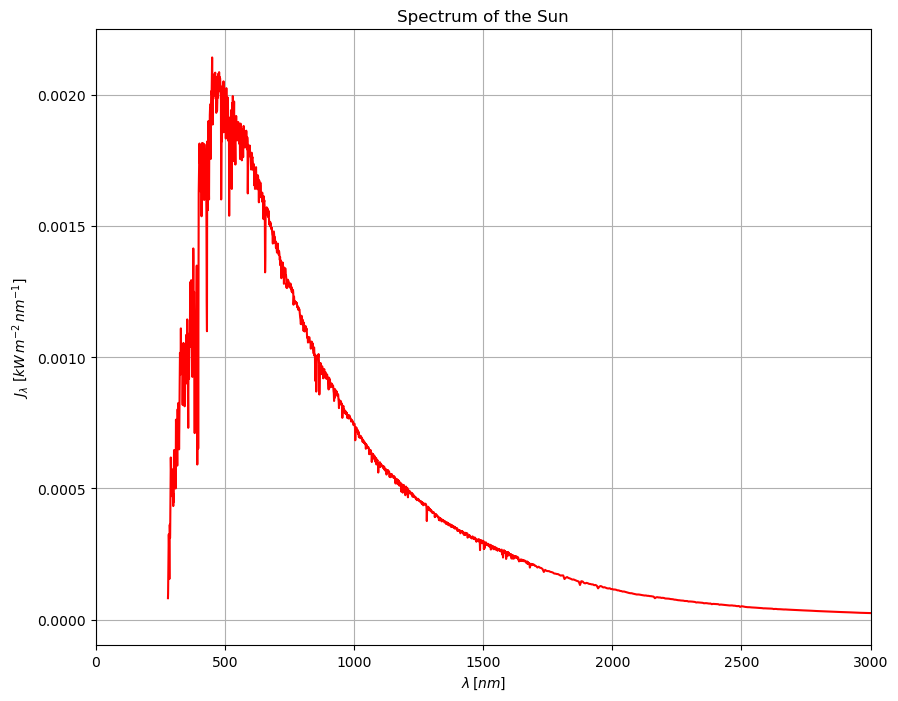

In [30]:
# Plotting 

# Open env.
plt.figure(figsize=(10,8))

# Plot
plt.plot(wavelength, radiosity, color = "red", linestyle = "-")

# Title
plt.title("Spectrum of the Sun")

# Axes titles
plt.xlabel(r"$\lambda\,[nm]$")
plt.ylabel(r"$J_{\lambda}\,\, [kW\,m^{-2}\,nm^{-1}]$")

plt.grid(True)

plt.xlim(0, 3000)
# Show/Save
plt.show()

In [31]:
#As suggested, let's compute the Spearman and Pearson coefficients

# Let's calculate these coefficients

# 1. Spearman coeffiecient

sp = st.spearmanr(wavelength, radiosity)

# 2. Pearson coefficient

pe = st.pearsonr(wavelength, radiosity)

print("Spearman:\n", sp)

print("Pearson:\n", pe)

Spearman:
 SignificanceResult(statistic=-0.8982764088594438, pvalue=0.0)
Pearson:
 PearsonRResult(statistic=-0.7468269532364071, pvalue=0.0)


The relation between the two variables does not look linear at all. The Pearson coeff indicates that there is a negative linear relation, but as we can see in the plot, the relation is not linear.

#### Part d

(d) Create a python function that defines the physically-motivated fitting function (i.e. $J_{\lambda}$ (in units of $[kW\,m^{-2}\,nm^{-1}]$) as obtained from the Planck law). Which variable should be the free parameter for the regression? **Hints:** Be very careful in handling the units and do not forget to use the Sun's solid angle computed in (a) to obtain the spectral radiosity from the spectral radiance.

$$B_\lambda =\frac{2hc^2}{\lambda^5}\frac 1{ \exp\left(\frac{hc}{\lambda k_\mathrm B T}\right) - 1}$$ 


The free parameter for the regression must be T (temperature)

In [32]:
# Define the function to fit the data

def planck_law(wavelength, T):
    
    h = ct.h # Planck constant
    c = ct.c # speed of light
    kb = ct.k # boltzmann constant
  
    #Convert nm to m
    
    wavelength_m = wavelength * 1e-9
    
    # Define the fitting model
    B_l = (2 * h * c**2)/(wavelength_m ** 5) * (1/(np.exp((h * c) / (wavelength_m * kb * T)) - 1))
    
    J = B_l * solid_angle * 1e-12 # In order to transform from W to kW and from m to nm 
    
    return J

#### Part e

(e) Carry out the regression using python tools (e.g. scipy's curve_fit function). Report the best-fit function, what is the temperature of the Sun? **Hint:** since the fitting function is not a simple polynomial function, it may help to aid curve_fit by providing an initial guess for the regression (see: p0 parameter).

In [33]:
# Define my initial guess for the temperature
p0 = [6000]

# Perform the regression
coef, cova = opt.curve_fit(planck_law, wavelength, radiosity, p0=p0)

# Extract the best-fit temperature
T_fit = coef[0]

According to the fitted parameters, the temperature of the sun is:

In [34]:
# Print the best fit temperature 

print("Best-fit Temperature:", T_fit, "K")

Best-fit Temperature: 5753.199394324132 K


Then, we can define our best fitted function as follows:

In [35]:
# Best fitted function

fitted_radiosity = planck_law(wavelength, T_fit)

#### Part f

(f) Make a high-quality labeled plot of spectral radiosity (in the Y axis) versus wavelength (in the X axis) showing both the experimental data and the best-fit model (obtained from Planck's law for the fitted temperature).



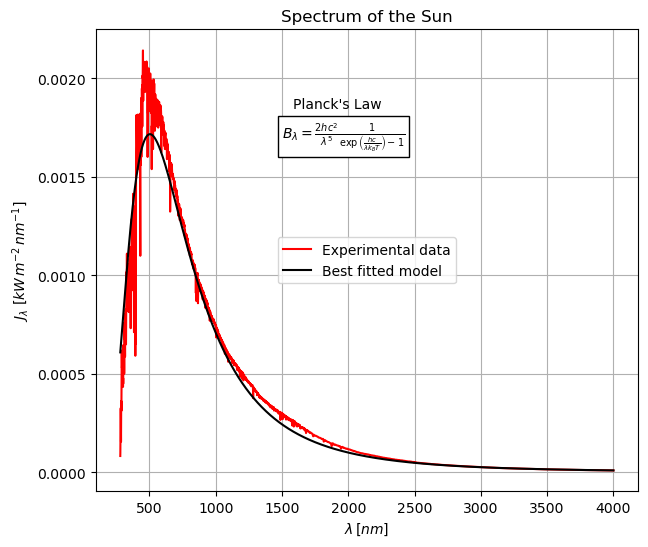

In [36]:
# Plotting the experimental data and the best-fit model 

# Plotting 

# Open env.
plt.figure(figsize=(7,6))

# Plot
plt.plot(wavelength, radiosity, color = "red", linestyle = "-", label = "Experimental data")
plt.plot(wavelength, fitted_radiosity, color = "black", linestyle = "-", label = "Best fitted model")

# Title with latex syntax
plt.title("Spectrum of the Sun")

# Axes titles
plt.xlabel(r"$\lambda\,[nm]$")
plt.ylabel(r"$J_{\lambda}\,\, [kW\,m^{-2}\,nm^{-1}]$")

plt.legend(loc="center")

plt.text(1580, 0.00185, "Planck's Law", fontsize=10, color='black')

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)

plt.text(1500, 0.0017, r"$B_\lambda =\frac{2hc^2}{\lambda^5}\frac {1}{ \exp\left(\frac{hc}{\lambda k_B T}\right) - 1}$", fontsize=10, color='black', bbox=bbox_props)

plt.grid(True)
# Show/Save
plt.show()

#### Part g

(g) Finally, you will compare the results to predictions based on classical theory. As you know, the black body radiation in classical theory is described by the Rayleigh-Jeans law. Create a python function that returns the spectral radiosity based on temperature, but now according to the Rayleigh-Jeans function given below. **Hint:** As before, be careful with the units and do not forget to use the Sun's solid angle computed in (a) to obtain the spectral radiosity, $J_{\lambda}$, from the spectral radiance:

$$B_{\lambda}= \frac{2ck_BT}{\lambda^4}$$


In [37]:
# Define the function

def rayleigh_jeans(wavelength, T):
    
    h = ct.h # Planck constant
    c = ct.c # speed of light
    kb = ct.Boltzmann # boltzmann constant
    
    wavelength_m = wavelength * 1e-9  # Convert wavelength to meters
    B_lambda = (2 * c * kb * T) / (wavelength_m**4)
    J_lambda = B_lambda * solid_angle * 1e-12 #  Convert to kW/m^2/nm 

    return J_lambda 

In [38]:
# Call the function
rj_radiance = rayleigh_jeans(wavelength, T_fit)

#### Part h


(h) Make a high-quality labeled plot of spectral radiance (in the Y axis) versus wavelength (in the X axis) showing the experimental data, the best-fit model (i.e. Planck's law for the fitted temperature), and the classical model obtained in (g). Does classical theory correctly describe the black body spectrum of the Sun? **Hint:** You may wish to limit the Y axis of the plot to be able to compare the lines.

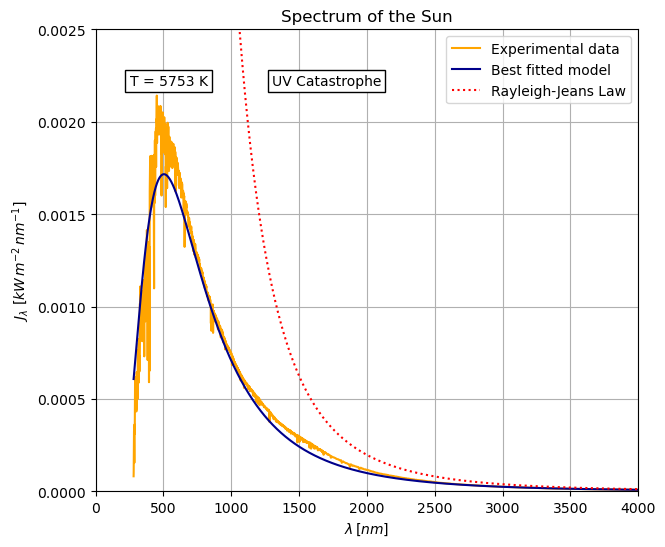

In [39]:
# Plotting 

# Open env.
plt.figure(figsize = (7,6))

# Plot
plt.plot(wavelength, radiosity, color = "orange", linestyle = "-", label = "Experimental data") # Exp. data
plt.plot(wavelength, fitted_radiosity, color = "darkblue", linestyle = "-", label = "Best fitted model") #fitted model
plt.plot(wavelength, rj_radiance, color = "red", linestyle = ":", label = "Rayleigh-Jeans Law") # Classic Theory


# Title
plt.title("Spectrum of the Sun")

# Axes titles
plt.xlabel(r"$\lambda\,[nm]$")
plt.ylabel(r"$J_{\lambda}\,\, [kW\,m^{-2}\,nm^{-1}]$")

plt.ylim(0, 0.0025)
plt.xlim(0, 4000)

plt.legend(loc="best")

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(1300, 0.0022, "UV Catastrophe", fontsize=10, color='black', bbox = bbox_props)

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(250, 0.0022, "T = 5753 K", fontsize=10, color='black', bbox = bbox_props)

plt.grid(True)

# Show/Save
plt.show()



As we can see, the classic theory fails to explain the black body radiation, because at small wavelengths, or high frequencies, the radiosity goes to infinity, which Experimental data showed not to be correct.  